In [4]:
#Import pandas(a data analysis tool)
import pandas as pd

#Import the data
df = pd.read_csv("/mutant_moneyball.csv")

# Data Cleaning & Tidy Process

In [5]:
#See what the DataFrame looks like
df.head()
#This step is important because it helps us understand the structure of the data and identify any issues/areas for cleaning and tidying.

#Here we can see that this is an untidy (wide) DataFrame. A wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.
#The long format, on the other hand, where each row represents a single observation of a specific attribute for a given data point is considered more tidy. This is because it adheres to tidy data principles: each variable forms a column, each observation forms a row, and each table represents a single observational unit.

,Member,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue60s_wiz,TotalValue70s_wiz,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue60s_oStreet,TotalValue70s_oStreet,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,929056.0,154585.0,23957.0,960.0,23335.0,3362.0,583.0,97.0,"$7,913.00","$1,105.00",$226.00,$65.75,"$68,160.00","$7,360.00",$975.00,$123.00
1,hankMcCoy,929776.0,20705.0,6631.0,881.0,23377.0,1224.0,289.0,82.0,"$7,953.00",$851.00,$89.00,$38.50,"$68,390.00","$5,260.00",$431.00,$81.00
2,scottSummers,933616.0,188635.0,29240.0,739.0,23420.0,5431.0,1031.0,82.0,"$7,993.00","$1,979.00",$438.00,$39.25,"$68,590.00","$11,675.00","$1,427.00",$74.00
3,bobbyDrake,929776.0,154585.0,1514.0,874.0,23377.0,3362.0,70.0,93.0,"$7,953.00","$1,105.00",$48.00,$62.00,"$68,390.00","$7,360.00",$137.00,$108.00
4,jeanGrey,933616.0,179899.0,16868.0,1708.0,23420.0,4903.0,665.0,170.0,"$7,993.00","$1,679.00",$165.00,$108.00,"$68,590.00","$10,265.00",$822.00,$189.00


In [6]:
# Melt the DataFrame
df_cleaned = pd.melt(df, id_vars=["Member"],
                       value_vars=["TotalValue60s_heritage",	"TotalValue70s_heritage",	"TotalValue80s_heritage",	"TotalValue90s_heritage",	"TotalValue60s_ebay",	"TotalValue70s_ebay",	"TotalValue80s_ebay",	"TotalValue90s_ebay",	"TotalValue60s_wiz",	"TotalValue70s_wiz",	"TotalValue80s_wiz",	"TotalValue90s_wiz",	"TotalValue60s_oStreet",	"TotalValue70s_oStreet",	"TotalValue80s_oStreet",	"TotalValue90s_oStreet"],
                       var_name="ValueType", value_name="Price")
#We use pd.melt() to convert the dataset from the wide format to the long format. This is done by specifying:
# - id_vars (Member): the identifier column that remains unchanged
# - value_vars(TotalValue60s_heritage, TotalValue70s_heritage, etc.): These columns contain the values that will be put into a single column in the long format.
# - var_name (ValueType): This creates a new column (ValueType) that stores the names of the original columns being melted (TotalValue60s_heritage becomes a value in the ValueType column).
# - value_name (Price): Creates a new column (Price) that stores the values from the melted columns.

#Melting the DataFrame is key in transforming the dataset into a tidy format. Tidy data principles state that each variable should be in its own column, and each observation should be in its own row. Melting helps achieve this by restructuring the data into long form.
#Additonally, long-format data is easier to manipulate, analyze, and visualize.

# Display the first few rows of the melted DataFrame
df_cleaned.head()

,Member,ValueType,Price
0,warrenWorthington,TotalValue60s_heritage,929056.0
1,hankMcCoy,TotalValue60s_heritage,929776.0
2,scottSummers,TotalValue60s_heritage,933616.0
3,bobbyDrake,TotalValue60s_heritage,929776.0
4,jeanGrey,TotalValue60s_heritage,933616.0


In [7]:
# 1) Split the "ValueType" column into "Source" and "Decade"

#We want to split the ValueType column into two separate columns: Decade and Source.
#This is important because the ValueType column contains combined information about the decade and source. Splitting this column into Decade and Source ensures that each variable is in its own column, adhering to tidy data principles.

df_cleaned[["Decade", "Source"]] = df_cleaned["ValueType"].str.split('_', expand=True)

# Display the first few rows
df_cleaned.head()

,Member,ValueType,Price,Decade,Source
0,warrenWorthington,TotalValue60s_heritage,929056.0,TotalValue60s,heritage
1,hankMcCoy,TotalValue60s_heritage,929776.0,TotalValue60s,heritage
2,scottSummers,TotalValue60s_heritage,933616.0,TotalValue60s,heritage
3,bobbyDrake,TotalValue60s_heritage,929776.0,TotalValue60s,heritage
4,jeanGrey,TotalValue60s_heritage,933616.0,TotalValue60s,heritage


In [8]:
# 2) Clean the "Decade" column to make it more readable (Remove the "TotalValue" prefix)

df_cleaned["Decade"] = df_cleaned["Decade"].str.replace("TotalValue", '')

#The Decade column currently contains values like TotalValue60s and TotalValue70s. However, the prefix TotalValue is redundant and makes the column less readable. This step removes the TotalValue prefix to make the Decade column cleaner (ex. 60s, 70s).
#Clean and readable column names improve the clarity of the dataset. Adheres to tidy data principles by ensuring that column names are descriptive and concise.

#Drop the "ValueType" column
df_cleaned.drop(columns=["ValueType"], inplace=True)
# ValueType column was created during the melting process to store the original column names. But after splitting this column into Decade and Source, the ValueType column is no longer needed and can be dropped.
# Removing unnecessary columns simplifies the dataset and reduces clutter.

# Display the first few rows
df_cleaned.head()

,Member,Price,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage


In [9]:
# 3) Clean the "Price" column

# The Price column contains strings with dollar signs and commas, which prevent it from being treated as numeric data. Cleaning this column ensures that we can perform mathematical operations and aggregations on the data.

df_cleaned['Price'] = (
    df_cleaned['Price']
    .astype(str)  # Convert all values to strings
    .str.replace('$', '')  # Remove dollar signs
    .str.replace(',', '')  # Remove commas
)

# Convert the 'Price' column to numeric (float)
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

# Display the first few rows
df_cleaned.head()

,Member,Price,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage


In [10]:
# 4) Check for missing values
print(df_cleaned.isnull().sum())

Member      0
Price     132
Decade      0
Source      0
dtype: int64


In [11]:
# Drop rows with missing values
df_cleaned.dropna(subset=['Price'], inplace=True)

In [12]:
# Display the final cleaned and tidied DataFrame
df_cleaned.head()

,Member,Price,Decade,Source
0,warrenWorthington,929056.0,60s,heritage
1,hankMcCoy,929776.0,60s,heritage
2,scottSummers,933616.0,60s,heritage
3,bobbyDrake,929776.0,60s,heritage
4,jeanGrey,933616.0,60s,heritage


# Visualization

In [13]:
#Import Seaborn for data visualization tasks
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-14-1546216eff7e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


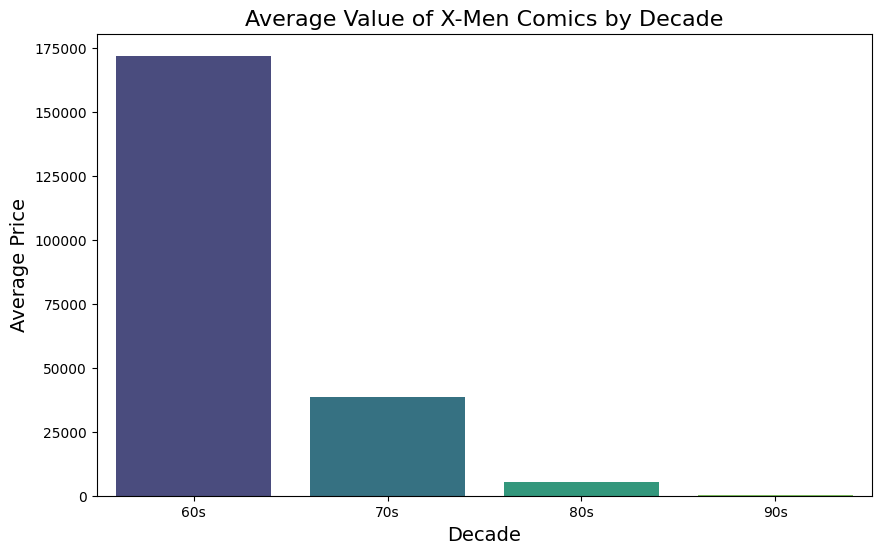

In [14]:
# Bar Plot (Average Price by Decade)

# Calculate the average price by decade
avg_price_by_decade = df_cleaned.groupby('Decade')['Price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(
    data=avg_price_by_decade,  # Data (average price by decade)
    x='Decade',                # X-axis: Decade
    y='Price',                 # Y-axis: Average Price
    palette='viridis'
)

# Labels and title
plt.title('Average Value of X-Men Comics by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

#Plot
plt.show()

#This bar plot depicts the average price of X-Men comics across the decades, with each bar representing a decade.
#This visualization is significant because it shows how the value of these comics has changed on average over the years.
#This visualization shows that on average, across all sources, the value of the older comics are much higher than the value of more recent ones.
#This trend suggests that age has a strong impact on the valuation of vintage comics.

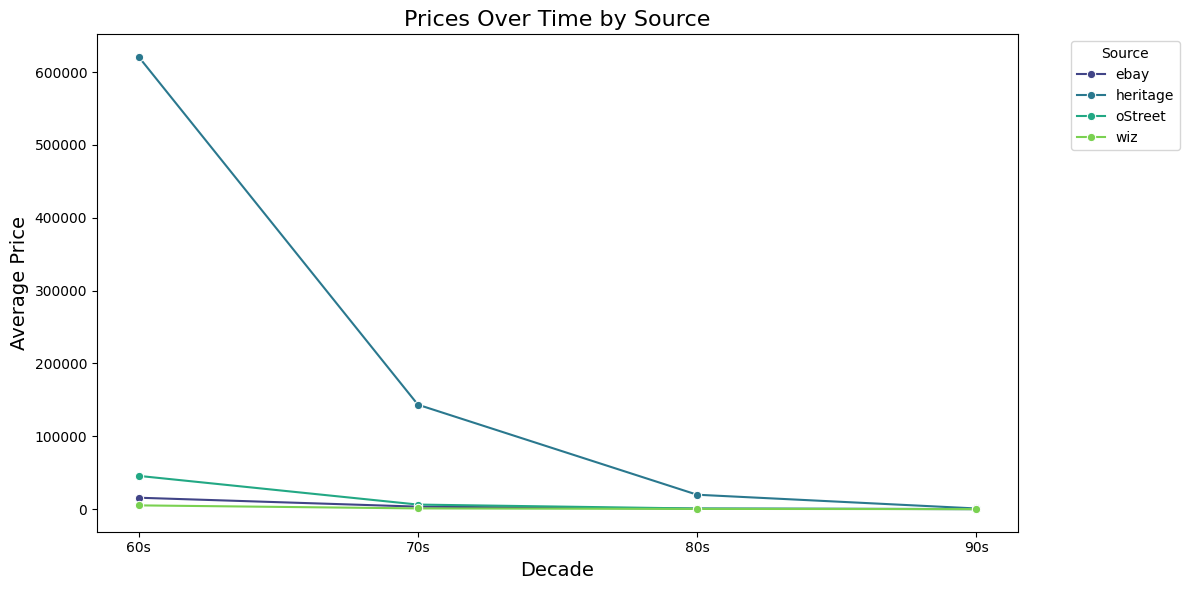

In [15]:
#Line Plot (Price over Time for each Source)

# Calculate the average price by Source and Decade
avg_price_by_source_decade = df_cleaned.groupby(['Source', 'Decade'])['Price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(
    data=avg_price_by_source_decade,  # The aggregated data
    x='Decade',                      # X-axis: Decade
    y='Price',                       # Y-axis: Average Price
    hue='Source',                    # Group by Source
    marker='o',                      # Add markers to the lines
    palette='viridis'                # Use a color palette
)

# Add labels and title
plt.title('Prices Over Time by Source', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

# Legend
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#The line plot extends the initial visualization by incorporating the variable of the source (eBay, Heritage, oStreet, and Wiz) to illustrate how different platforms evaluate the value of X-Men comics over the decades.
#This addition reveals significant insights into the variability and consistency of comic book valuations across different marketplaces.
#Notably, the plot shows that the prices of comics sourced from eBay, oStreet, and Wiz remain relatively stable across the decades, indicating a consistent market perception of value on these platforms. In contrast, Heritage exhibits a substantial variation in prices over time, with notable peaks and troughs.
#This discrepancy suggests that Heritage may place a higher emphasis on factors such as rarity, condition, or historical significance, leading to more pronounced fluctuations in value.

# Pivot-Table

In [18]:
# Create a pivot table: calculate the standard deviation of "Price" by "Source" and "Decade"
pivot_table_std_source_decade = pd.pivot_table(
    df_cleaned,               # The tidy dataset
    values="Price",           # The values to aggregate
    index="Source",           # The rows of the pivot table (group by "Source")
    columns="Decade",         # The columns of the pivot table (group by "Decade")
    aggfunc="std",            # The aggregation function (standard deviation)
    fill_value=0              # Fill missing values with 0
)

# Display the pivot table
print("\nPivot Table (Standard Deviation of Price by Source and Decade):")
print(pivot_table_std_source_decade)

#The standard deviation generally decreases from the 60s to the 90s for most sources, indicating that prices became more consistent over time. For example, Heritage drops from 408395.11 in the 60s to 591.52 in the 90s.
#Heritage has the highest variability in prices across all decades, suggesting a wide range of high and low-value items, while Wiz has the lowest variability, indicating more uniform pricing.
#The extremely high standard deviation for Heritage in the 60s (408395.11) could indicate the presence of outliers or very high-value items that skew the data.


Pivot Table (Standard Deviation of Price by Source and Decade):
Decade              60s           70s           80s         90s
Source                                                         
ebay       10425.617616   1403.317094    534.065735   81.354882
heritage  408395.112113  53348.542806  19213.492572  591.515904
oStreet    30938.307615   2849.245935    789.393370   69.757155
wiz         3540.908603    492.515025    295.810750   46.165733
